In [22]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## What is eXplainable AI?
eXplainable AI (XAI) refers to methods and techniques that allow human users to understand, trust, and manage the results of machine learning models.

In essence, it aims to transform black-box models into glass-box models where every decision made by the model is transparent and interpretable.

https://drlee.io/explainable-ai-a-deep-dive-into-linear-regression-using-explainable-ai-techniques-1315464730ab

In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Why Use Linear Regression for Explainability?
Linear regression is a foundational statistical method that models the relationship between a dependent variable and one or more independent variables.

Despite its simplicity, it provides a high degree of transparency. Each coefficient in a linear model can be directly interpreted as the effect of a one-unit change in the corresponding independent variable on the dependent variable, holding all other variables constant.

In [2]:
df = pd.read_csv("./../Datasets/desharnais.csv")
df.sample(5)

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
34,35,35,2,2,88,3,651,126,49,175,38,180,3
68,69,69,1,2,87,5,2548,74,43,117,25,105,2
0,1,1,1,4,85,12,5152,253,52,305,34,302,1
16,17,17,4,3,85,8,3192,57,43,100,43,108,1
67,68,68,1,3,86,6,1267,42,31,73,27,67,2


In [35]:
X = df.loc[:, df.columns != 'Effort']
X = X.loc[:, X.columns != 'id']
X = X.loc[:, X.columns != 'Project']

y = df['Effort']
X

,TeamExp,ManagerExp,YearEnd,Length,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
0,1,4,85,12,253,52,305,34,302,1
1,0,0,86,4,197,124,321,33,315,1
2,4,4,85,1,40,60,100,18,83,1
3,0,0,86,5,200,119,319,30,303,1
4,0,0,86,4,140,94,234,24,208,1
5,0,0,86,4,97,89,186,38,192,1
6,2,1,85,9,119,42,161,25,145,2
7,1,2,83,13,186,52,238,25,214,1
8,3,1,85,12,172,88,260,30,247,1
9,3,4,83,4,78,38,116,24,103,1


In [4]:
X
x_columns = X.columns.to_numpy()
x_columns

array(['TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Transactions',
       'Entities', 'PointsNonAdjust', 'Adjustment', 'PointsAjust',
       'Language'], dtype=object)

In [5]:
y

0      5152
1      5635
2       805
3      3829
4      2149
5      2821
6      2569
7      3913
8      7854
9      2422
10     4067
11     9051
12     2282
13     4172
14     4977
15     1617
16     3192
17     3437
18     4494
19      840
20    14973
21     5180
22     5775
23    10577
24     3983
25     3164
26     3542
27     4277
28     7252
29     3948
30     3927
31      710
32     2429
33     6405
34      651
35     9135
36     1435
37     5922
38      847
39     8050
40     4620
41     2352
42     2174
43    19894
44     6699
45    14987
46     4004
47    12824
48     2331
49     5817
50     2989
51     3136
52    14434
53     2583
54     3647
55     8232
56     3276
57     2723
58     3472
59     1575
60     2926
61     1876
62     2520
63     1603
64     3626
65     6783
66    11361
67     1267
68     2548
69     1155
70      546
71     2275
72     9100
73      595
74     3941
75    13860
76     1400
77     2800
78     9520
79     5880
80    23940
Name: Effort, dtype: int64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Without Preprocessing

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = model.predict(X_test)

y_pred = y_pred.astype(np.int64)
y_pred

y_test = y_test.astype(np.int64)
y_test.values

array([ 3927,  5152,  5775,   710,  4494,  7252,  4067,   546,  2149,
        2282,  5817,  6405,  1267,  9135,  2548, 14987,   595,  1876,
        8232,  4620,  2422,  3626,  2821, 12824,   651])

In [9]:
r2_score(y_test, y_pred)

0.4402675013662478

# With Preprocessing

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_test_scaled

array([[ 1.18195937,  0.29957234,  0.18520473, -0.88296674, -0.75989186,
         0.04768083, -0.58725644, -0.09982048, -0.58413497, -0.78729582],
       [-0.95319304,  0.89871703, -0.61260026, -0.10223825,  0.35338228,
        -0.95692114, -0.08751022,  0.55234001, -0.0356777 , -0.78729582],
       [-0.24147557,  0.89871703,  0.18520473, -1.01308816,  0.69248302,
         0.10055461,  0.59071678,  0.83183737,  0.67437858, -0.78729582],
       [-0.95319304, -0.89871703,  0.18520473, -0.4926025 , -0.33761546,
        -1.1419794 , -0.70964326, -0.09982048, -0.69186765,  2.15194191],
       [ 0.4702419 ,  0.89871703,  0.98300971,  0.15800458, -1.20776077,
         3.45804014,  0.37144038, -0.6588152 ,  0.15040601,  0.68232305],
       [ 1.18195937,  0.89871703, -0.61260026,  0.4182474 , -0.52316115,
         0.6028556 , -0.1843998 , -0.09982048, -0.22665836, -0.78729582],
       [ 1.18195937, -0.89871703, -1.41040524,  1.06885448, -0.19685666,
        -0.33565413, -0.28638882, -0.37931784

In [11]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [12]:
lr.coef_
lr.intercept_

5260.1964285714275

In [13]:
y_pred = lr.predict(X_test_scaled)

y_pred = y_pred.astype(np.int64)
y_pred

y_test = y_test.astype(np.int64)
y_test.values

array([ 3927,  5152,  5775,   710,  4494,  7252,  4067,   546,  2149,
        2282,  5817,  6405,  1267,  9135,  2548, 14987,   595,  1876,
        8232,  4620,  2422,  3626,  2821, 12824,   651])

In [14]:
r2_score(y_test, y_pred)

0.4402675013662478

# With statsmodels

In [15]:
x = sm.add_constant(X_train_scaled)
model = sm.OLS(y_train, x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Effort   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     14.53
Date:                Fri, 17 Jan 2025   Prob (F-statistic):           9.11e-11
Time:                        10:27:34   Log-Likelihood:                -514.97
No. Observations:                  56   AIC:                             1050.
Df Residuals:                      46   BIC:                             1070.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5260.1964    351.668     14.958      0.000    4552.326    5968.066
x1          -603.9246    455.333     -1.326      0.191   -1520.463     312.613
x2           280.6972    440.789      0.637      0.527    -606.565    1167.960
x3           318.1516    403.799      0.788      0.435    -494.654    1130.958
x4          1157.7866    575.391      2.012      0.050      -0.415    2315.988
x5         -3900.6370   1950.428     -2.000      0.051   -7826.644      25.370
x6         -2246.9553   1025.597     -2.191      0.034   -4311.375    -182.535
x7         -3975.7323   1911.848     -2.080      0.043   -7824.082    -127.382
x8          -851.7975    810.578     -1.051      0.299   -2483.407     779.812
x9          1.245e+04   4678.092      2.661      0.011    3031.394    2.19e+04
x10        -1424.8224    407.487     -3.497      0.001   -2245.052    -604.593
==============================================================================
Omnibus:                        9.767   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               12.426
Skew:                           0.621   Prob(JB):                      0.00200
Kurtosis:                       4.945   Cond. No.                     1.82e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.37e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [16]:
model.params
type(x)
x

array([[ 1.00000000e+00, -9.53193037e-01, -8.98717034e-01,
         1.85204729e-01, -1.01308816e+00, -7.66289989e-01,
        -3.35654135e-01, -7.40239971e-01, -1.31097570e+00,
        -8.28981966e-01, -7.87295822e-01],
       [ 1.00000000e+00, -9.53193037e-01, -8.98717034e-01,
         1.78081470e+00, -3.62481084e-01, -8.55863770e-01,
        -9.30484247e-01, -1.04110759e+00, -2.86152056e-01,
        -9.95477922e-01, -7.87295822e-01],
       [ 1.00000000e+00, -9.53193037e-01,  2.99572345e-01,
         1.85204729e-01, -1.02238254e-01, -4.20791118e-01,
        -4.67838604e-01, -5.15864120e-01, -2.14946777e+00,
        -7.55527868e-01,  6.82323045e-01],
       [ 1.00000000e+00,  1.18195937e+00,  2.99572345e-01,
        -6.12600257e-01, -6.22723914e-01, -9.00650661e-01,
        -1.07588716e+00, -1.13289771e+00,  1.39083208e+00,
        -9.85684043e-01, -7.87295822e-01],
       [ 1.00000000e+00,  4.70241898e-01,  2.99572345e-01,
         1.78081470e+00,  4.18247405e-01,  6.66890512e-01,
  

In [17]:
y_pred = model.predict(sm.add_constant(X_test_scaled))
y_pred

array([ 2794.33388264,  7101.67310386,  8076.48222653,   183.01291107,
        2649.60978258,  4892.54893394,  4782.13300754,    97.10869661,
        3983.16352126,  2084.36896277,  3616.07190778,  5146.52878184,
        1013.33763028,  7527.88129758,  1376.3086587 ,  7523.57446792,
       -1203.41277001,   617.37185907,  2077.74208364,  8248.15063742,
        1807.41736284,  4160.60878457,  4091.64181073,  6862.04104632,
        -306.70898875])

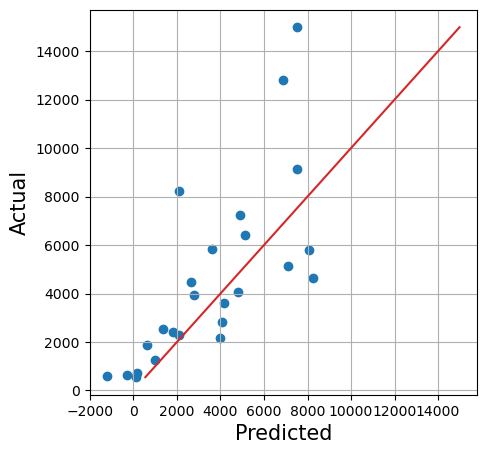

In [18]:
fig, ax = plt.subplots(figsize=(5, 5));

plt.scatter(y_pred, y_test);
plt.xlabel('Predicted',size=15);
plt.ylabel('Actual', size=15);

ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='tab:red');

ax.grid();

# Correlation Matrix: Finding Hidden Relationships

We’ll create a correlation matrix to understand how each feature is linearly related to others


## Reading the Correlation Matrix: Each value in the correlation matrix ranges from -1 to +1:

+1: Perfect positive correlation (as one feature increases, the other also increases).

-1: Perfect negative correlation (as one feature increases, the other decreases).

0: No linear relationship between the two features.

## Identifying Redundant Features:

Features that have high correlations (either positive or negative) with one another may provide redundant information.

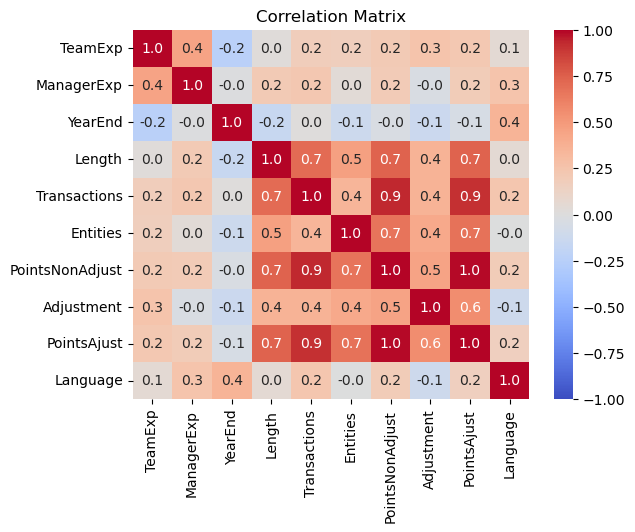

In [19]:
corr_matrix = pd.DataFrame(X_train_scaled).corr();

corr_matrix.columns = x_columns
corr_matrix.index = x_columns

sns.heatmap(corr_matrix, cmap="coolwarm", fmt=".1f", vmin=-1, vmax=1,annot=True);

plt.title("Correlation Matrix");

# t-Statistic: A Measure of Feature Significance

In regression analysis, the t-statistic measures how many standard deviations the estimated coefficient is away from zero. 

A high absolute value of the t-statistic suggests that the corresponding feature has a significant impact on the dependent variable, while a low t-statistic suggests that the feature is not significantly contributing to the model.

It helps measure the significance of each feature in the regression model.

## The Role of the t-Statistic:

The t-statistic is used to test the null hypothesis that a particular coefficient is equal to zero (meaning the feature has no effect).

A high absolute t-statistic (typically > 2) suggests rejecting the null hypothesis, implying that the feature significantly affects the target variable.

## Feature Importance:

Features with large absolute t-statistics are crucial to the model’s predictions.

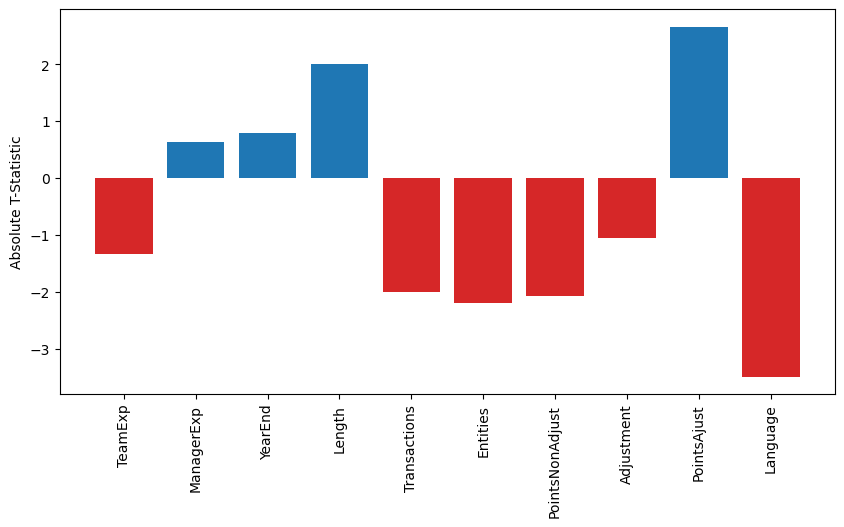

In [20]:
t_statistic = model.tvalues[1:] # exclude the constant
colors = ['tab:red' if t < 0 else 'tab:blue' for t in t_statistic]

plt.figure(figsize=(10, 5));
plt.bar(x_columns, t_statistic, color=colors);

plt.ylabel('Absolute T-Statistic');
plt.xticks(rotation=90);

# Weight Plot: Understanding Feature Influence

A Weight Plot visualizes the coefficients of a linear model, helping to understand the direction (positive or negative) and magnitude of each feature’s effect on the target variable.

## Interpreting the Weight Plot: What are Weights?

Weights are the coefficients (e.g., coef values) obtained from the linear regression model. They represent the degree of change in the target variable (y) for a one-unit change in the corresponding feature, holding other features constant.

### Positive vs. Negative Weights:

Positive Weights: Indicate that as the feature value increases, the target value also increases.

Negative Weights: Indicate that as the feature value increases, the target value decreases.

## Magnitude of Weights:

The larger the absolute value of the weight, the more influential the feature is on the target variable.


## Visual Interpretation:

The Weight Plot will visually highlight the most impactful features by the length of the bars. Features with larger bars (either positive or negative) are the ones driving the model’s predictions the most.

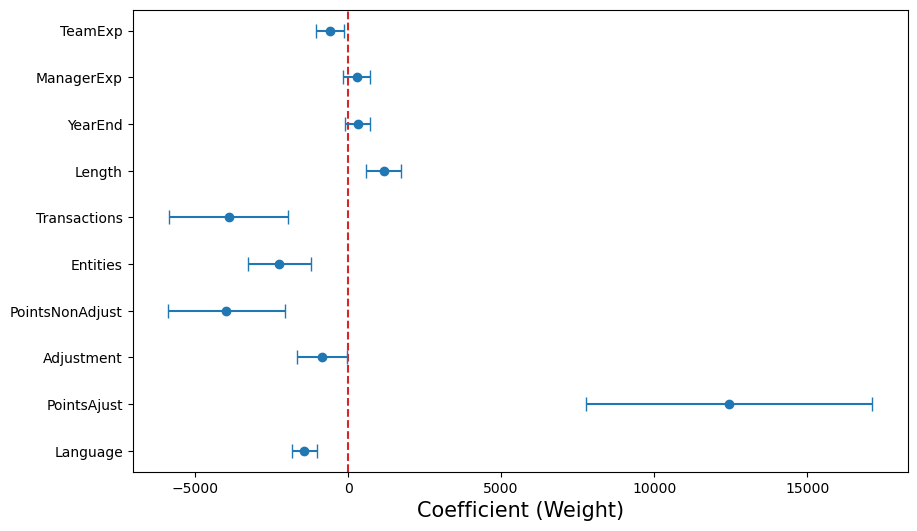

In [21]:
coefficients = model.params[1:][::-1]
se = model.bse[1:][::-1]
features = x_columns[::-1]

plt.figure(figsize=(10, 6));
plt.xlabel('Coefficient (Weight)', size=15);

plt.axvline(x=0, color='tab:red', linestyle='--');
plt.errorbar(coefficients, features, xerr=se, fmt='o', capsize=5);

# SHAP (SHapley Additive exPlanations): The Gold Standard for Model Explainability
SHAP (SHapley Additive exPlanations) values are a state-of-the-art method for explaining the output of any machine learning model. Rooted in cooperative game theory, SHAP values assign each feature an importance score, reflecting its contribution to the prediction. SHAP provides both global and local interpretability, making it one of the most comprehensive methods for understanding model behavior.

## Interpreting SHAP Values: What are SHAP Values?

SHAP values quantify how much each feature contributes to a specific prediction by considering all possible feature combinations.
They offer a unified measure of feature importance and provide insights into whether a feature increases or decreases a prediction.

### Reading SHAP Values:

A positive SHAP value indicates that the feature increases the prediction, while a negative SHAP value suggests that the feature decreases the prediction.
The magnitude of the SHAP value represents the strength of the feature’s contribution.

## Why Use SHAP?

SHAP values are model-agnostic, meaning they can be applied to any machine learning model, from linear regression to complex neural networks.
They provide both local explanations (for individual predictions) and global explanations (for the entire model).

## SHAP Summary Plot:

A SHAP summary plot visualizes the impact of each feature across all predictions.
The x-axis represents the SHAP value (impact on the model output), while the y-axis lists the features.
Each point in the plot represents a SHAP value for an individual prediction, with color encoding showing the feature value (red for high, blue for low).

## SHAP Dependence Plot:

This plot shows how the SHAP value of a feature changes as the feature itself varies.
It is useful for understanding how a feature influences the prediction across its range and whether its effect is linear or interacts with other features.

## Visual Interpretation:

SHAP values for each feature can be visualized in a waterfall plot or a force plot, showing how the model arrives at a particular prediction.

https://app.datacamp.com/learn/tutorials/introduction-to-shap-values-machine-learning-interpretability

In [23]:
# !pip3 install utils shap
import shap

In [24]:
explainer = shap.KernelExplainer(model.predict, x)
shap_values = explainer(x)

  0%|          | 0/56 [00:00<?, ?it/s]

In [25]:
shap_values[0]

.values =
array([     0.        ,    575.65675757,   -252.26732419,     58.92317652,
        -1172.93986783,   2989.01904952,    754.19983324,   2942.9959406 ,
         1116.68584403, -10319.08913452,   1121.75669066])

.base_values =
5260.19642857143

.data =
array([ 1.        , -0.95319304, -0.89871703,  0.18520473, -1.01308816,
       -0.76628999, -0.33565413, -0.74023997, -1.3109757 , -0.82898197,
       -0.78729582])

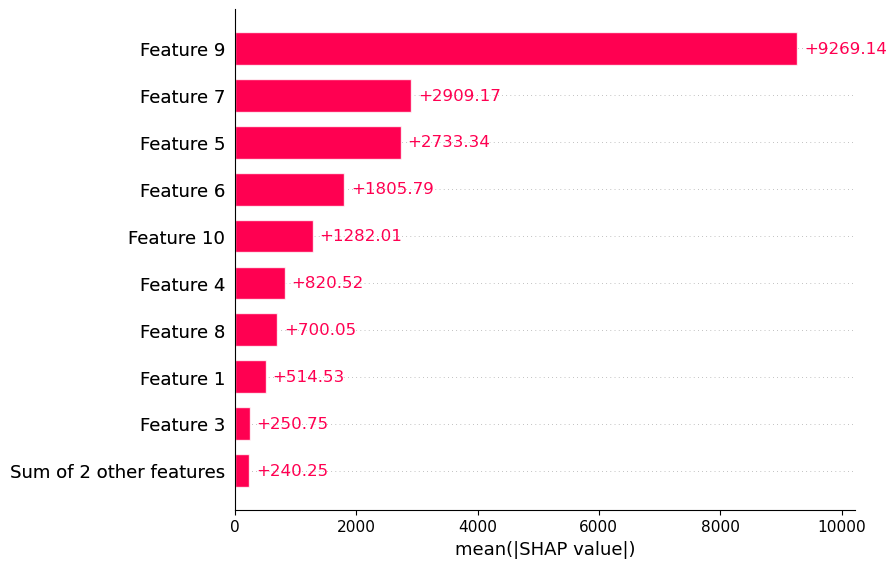

In [33]:
shap.plots.bar(shap_values)

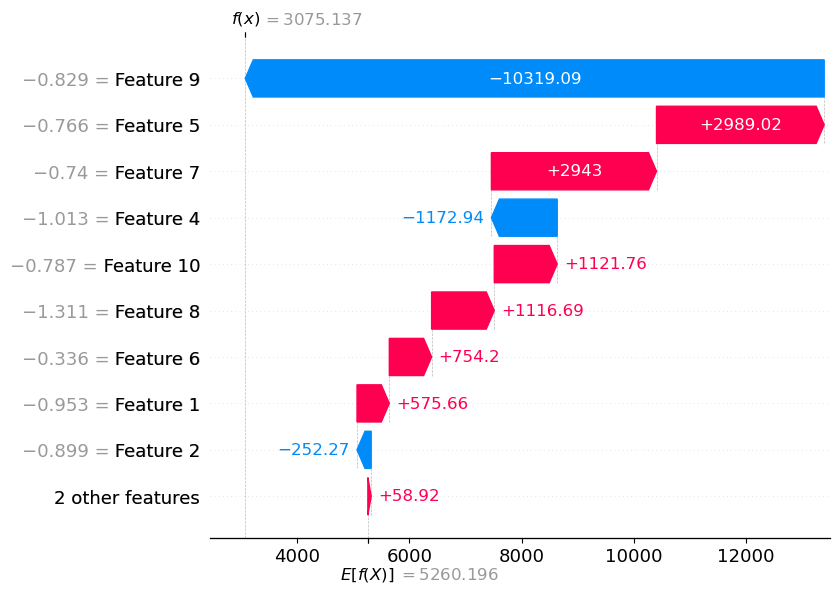

In [26]:
shap.plots.waterfall(shap_values[0])

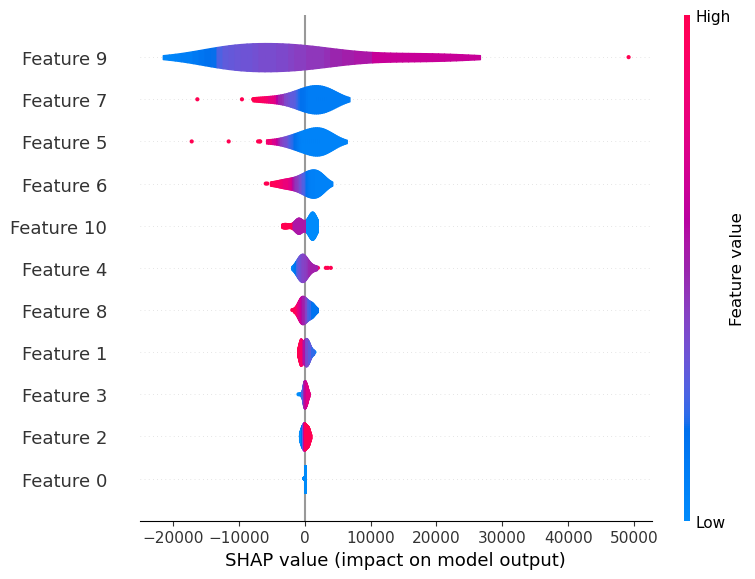

In [31]:
shap.summary_plot(shap_values, x, plot_type='violin')

# With Xgboost and preprocessing

In [ ]:
# !pip3 install xgboost
import xgboost as xgb

mod = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
mod.fit(X_train_scaled, y_train)

mod.predict(X_train_scaled)
r2_score(y_test, y_pred)